In [1]:
import numpy as np
import pandas as pd

In [4]:
qso_1157028052409 = pd.read_csv('./data/result_web_file2WxlOQ.csv')
qso_1157028052409

,MasterID,Mag,Magerr,RA,Dec,MJD,Blend
0,1157028052409,16.97,0.10,140.99500,58.81856,54070.37112,0
1,1157028052409,16.88,0.10,140.99504,58.81861,54070.37478,0
2,1157028052409,16.93,0.10,140.99522,58.81864,54070.37847,0
3,1157028052409,16.94,0.10,140.99485,58.81854,54070.38214,0
4,1157028052409,16.67,0.08,140.99501,58.81846,53767.23009,0
...,...,...,...,...,...,...,...
156,1157028052409,16.62,0.08,140.99503,58.81842,56400.19347,0
157,1157028052409,16.73,0.08,140.99492,58.81839,56589.47431,0
158,1157028052409,16.76,0.08,140.99490,58.81838,56589.48192,0
159,1157028052409,16.76,0.08,140.99488,58.81844,56589.48950,0


In [5]:
qso_1126057007137 = pd.read_csv('./data/result_web_fileok3O2W.csv')
qso_1126057007137

,MasterID,Mag,Magerr,RA,Dec,MJD,Blend
0,1126057007137,17.85,0.11,174.81859,25.73693,53470.26035,0
1,1126057007137,17.77,0.11,174.81867,25.73691,53470.26765,0
2,1126057007137,17.79,0.11,174.81860,25.73690,53470.27496,0
3,1126057007137,17.82,0.11,174.81869,25.73691,53470.28224,0
4,1126057007137,17.88,0.11,174.81864,25.73692,53490.22663,0
...,...,...,...,...,...,...,...
393,1126057007137,17.59,0.10,174.81863,25.73694,56443.22767,0
394,1126057007137,17.51,0.10,174.81861,25.73707,56463.16390,0
395,1126057007137,17.50,0.10,174.81871,25.73685,56463.16894,0
396,1126057007137,17.65,0.10,174.81861,25.73692,56463.17401,0


In [7]:
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
context = 'talk'
sns.set_context(context)
sns.set_style('ticks')
sns.set_palette('colorblind')
rcparams = {'font.family': 'DejaVu Sans',
            'font.serif': 'Times',
            'lines.markersize': np.sqrt(10),
            'text.latex.preamble': r'\\usepackage{amsmath}',
            'text.usetex': False,
            # 'hatch.linewidth' : 3.0,
            'figure.figsize': (12.8, 9.6),
            'xtick.direction': 'in',
            'xtick.top': True,
            'xtick.minor.visible': True,
            'ytick.minor.visible': True,
            'ytick.right': True,
            'ytick.direction': 'in'}
plt.rcParams.update(rcparams)
cs = plt.rcParams['axes.prop_cycle'].by_key()['color']

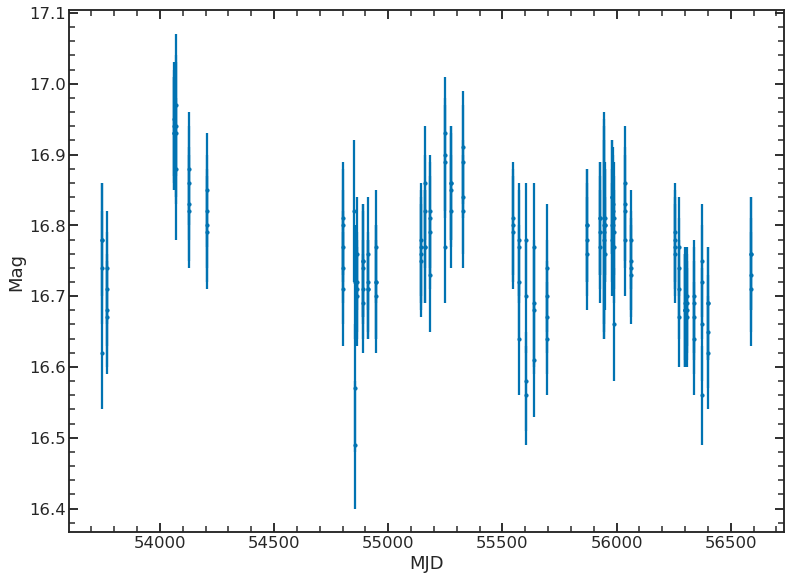

In [10]:
plt.figure()
plt.errorbar(qso_1157028052409['MJD'], qso_1157028052409['Mag'], yerr=qso_1157028052409['Magerr'],
            marker='o', linestyle='none')
plt.xlabel('MJD')
plt.ylabel('Mag')
plt.show()

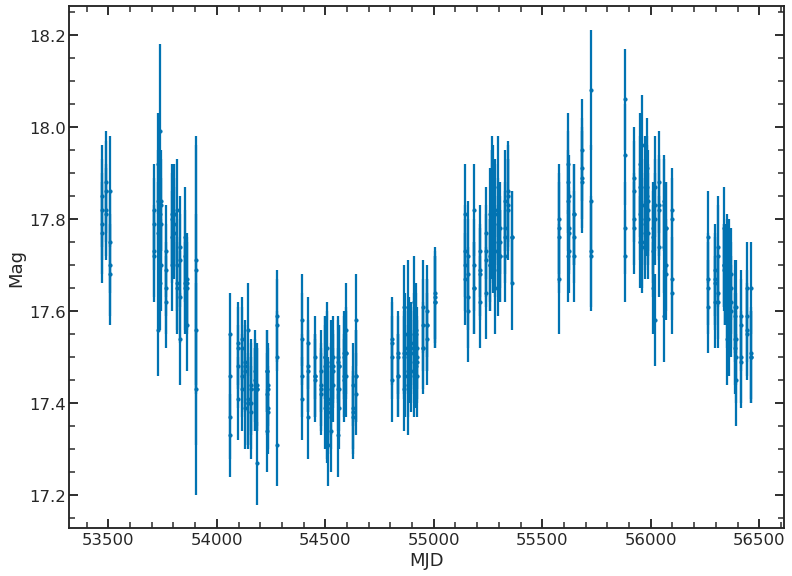

In [11]:
plt.figure()
plt.errorbar(qso_1126057007137['MJD'], qso_1126057007137['Mag'], yerr=qso_1126057007137['Magerr'],
            marker='o', linestyle='none')
plt.xlabel('MJD')
plt.ylabel('Mag')
plt.show()

In [15]:
from astropy.timeseries import LombScargle
import astropy.units as u

In [20]:
qso_1126057007137_mjd = (qso_1126057007137['MJD'].values * u.day).to(u.s)
qso_1126057007137_mag = qso_1126057007137['Mag'].values * u.mag
qso_1126057007137_magerr = qso_1126057007137['Magerr'].values * u.mag
frequency, power = LombScargle(qso_1126057007137_mjd, qso_1126057007137_mag, qso_1126057007137_magerr).autopower()

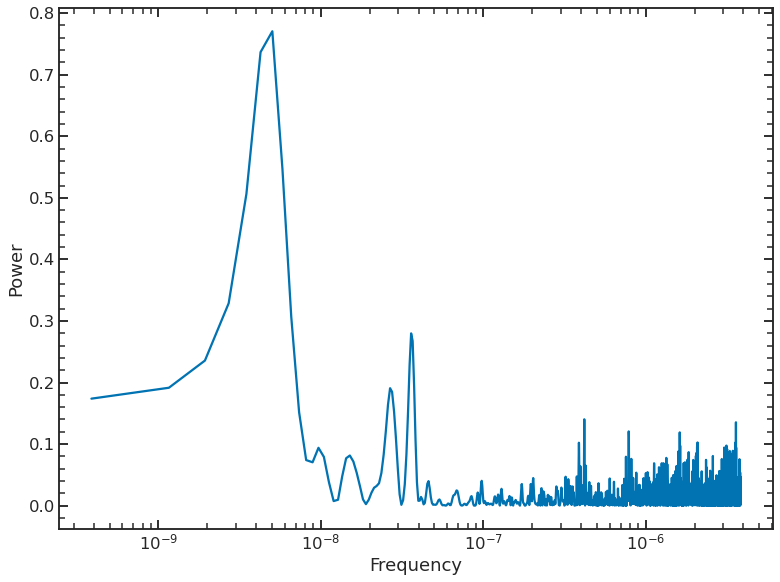

In [22]:
plt.figure()
plt.plot(frequency, power)
plt.xlabel('Frequency')
plt.ylabel('Power')

plt.xscale('log')
plt.show()